Let's establish connection between Mysql and Jupyter Notebook and use the studentdb database where the csv file was loaded

In [31]:
import mysql.connector
import pandas as pd
con = mysql.connector.connect(
    host = "localhost",
    port = 3306,
    user = "root",
    password = "6thExtinction",
    database = "studentdb"
)

# Dataset Description

The datasets contains marks obtained by 10 students in 8 subjects

Let's read the studentmarks table stored in the studentdb database in Mysql

In [32]:
df = pd.read_sql_query("select * from studentmarks",con)

In [33]:
df

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,Annu,F,1988-04-05,45,87,52,89,55,89,87,52
1,Farha,F,1990-08-12,55,63,89,75,78,75,63,89
2,Jennifer,F,1989-09-02,58,96,78,46,96,77,83,53
3,Jessica,F,1990-08-12,78,96,86,63,54,89,75,45
4,John,M,1988-04-05,55,45,56,87,21,52,89,65
5,Mukesh,M,1989-09-02,96,46,77,83,58,83,46,77
6,pooja,F,1987-05-04,55,64,61,58,75,58,64,61
7,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
8,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87
9,Suresh,M,1987-05-04,75,96,78,64,90,61,58,2


In [34]:
df.shape

(10, 11)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       10 non-null     object
 1   Gender     10 non-null     object
 2   DOB        10 non-null     object
 3   Maths      10 non-null     int64 
 4   Physics    10 non-null     int64 
 5   Chemistry  10 non-null     int64 
 6   English    10 non-null     int64 
 7   Biology    10 non-null     int64 
 8   Economics  10 non-null     int64 
 9   History    10 non-null     int64 
 10  Civics     10 non-null     int64 
dtypes: int64(8), object(3)
memory usage: 1008.0+ bytes


Let's change the datatype of "DOB" column to datetime

In [36]:
df['DOB'] = pd.to_datetime(df['DOB'])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       10 non-null     object        
 1   Gender     10 non-null     object        
 2   DOB        10 non-null     datetime64[ns]
 3   Maths      10 non-null     int64         
 4   Physics    10 non-null     int64         
 5   Chemistry  10 non-null     int64         
 6   English    10 non-null     int64         
 7   Biology    10 non-null     int64         
 8   Economics  10 non-null     int64         
 9   History    10 non-null     int64         
 10  Civics     10 non-null     int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 1008.0+ bytes


In [38]:
df

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,Annu,F,1988-04-05,45,87,52,89,55,89,87,52
1,Farha,F,1990-08-12,55,63,89,75,78,75,63,89
2,Jennifer,F,1989-09-02,58,96,78,46,96,77,83,53
3,Jessica,F,1990-08-12,78,96,86,63,54,89,75,45
4,John,M,1988-04-05,55,45,56,87,21,52,89,65
5,Mukesh,M,1989-09-02,96,46,77,83,58,83,46,77
6,pooja,F,1987-05-04,55,64,61,58,75,58,64,61
7,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
8,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87
9,Suresh,M,1987-05-04,75,96,78,64,90,61,58,2


Let's look into descriptive statistics of marks obtained by students

In [39]:
df.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


1. Average marks obtained is highest for Chemistry and least for Maths

2. Variance of Marks is highest for Biology and least for Chemistry

Hence we can say that students have performed the best in Chemistry and the worst in Maths

3. The minimun score was in Civics (2), which is probably a typo

In [40]:
df[df["DOB"] == df["DOB"].max()]

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
1,Farha,F,1990-08-12,55,63,89,75,78,75,63,89
3,Jessica,F,1990-08-12,78,96,86,63,54,89,75,45


Farha and Jessica are the youngest in the dataset

In [41]:
df[df["DOB"] == df["DOB"].min()]

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
6,pooja,F,1987-05-04,55,64,61,58,75,58,64,61
9,Suresh,M,1987-05-04,75,96,78,64,90,61,58,2


Pooja and Suresh are the eldest in the dataset

Let's look into the distribution of marks for different subjects

Text(0.5, 1.0, 'Number of Student vs Marks in Maths')

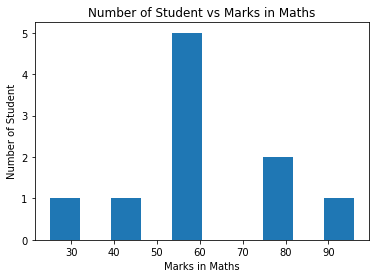

In [43]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.hist(df["Maths"])
plt.xlabel('Marks in Maths')
plt.ylabel('Number of Student')
plt.title('Number of Student vs Marks in Maths')

Most of the students have obtained avrage marks in Maths

Text(0.5, 1.0, 'Number of Student vs Marks in Physics')

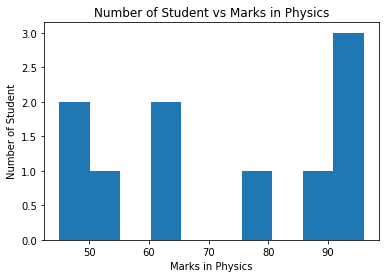

In [44]:
plt.hist(df["Physics"])
plt.xlabel('Marks in Physics')
plt.ylabel('Number of Student')
plt.title('Number of Student vs Marks in Physics')

Text(0.5, 1.0, 'Number of Student vs Marks in Chemistry')

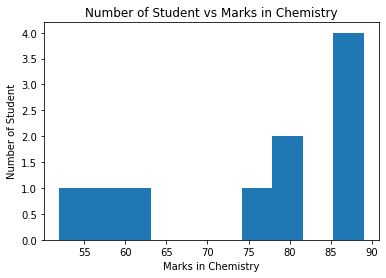

In [45]:
plt.hist(df["Chemistry"])
plt.xlabel('Marks in Chemistry')
plt.ylabel('Number of Student')
plt.title('Number of Student vs Marks in Chemistry')

Clearly majority of the students have performed better in Chemistry

Text(0.5, 1.0, 'Number of Student vs Marks in English')

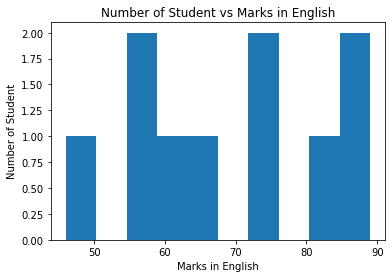

In [46]:
plt.hist(df["English"])
plt.xlabel('Marks in English')
plt.ylabel('Number of Student')
plt.title('Number of Student vs Marks in English')

Text(0.5, 1.0, 'Number of Student vs Marks in Biology')

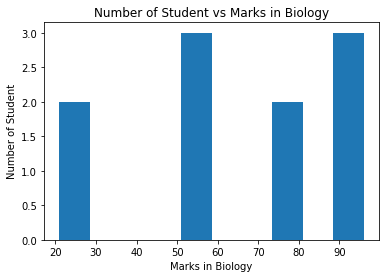

In [48]:
plt.hist(df["Biology"])
plt.xlabel('Marks in Biology')
plt.ylabel('Number of Student')
plt.title('Number of Student vs Marks in Biology')

Text(0.5, 1.0, 'Number of Student vs Marks in Economics')

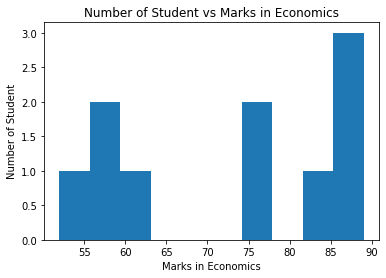

In [49]:
plt.hist(df["Economics"])
plt.xlabel('Marks in Economics')
plt.ylabel('Number of Student')
plt.title('Number of Student vs Marks in Economics')

Text(0.5, 1.0, 'Number of Student vs Marks in History')

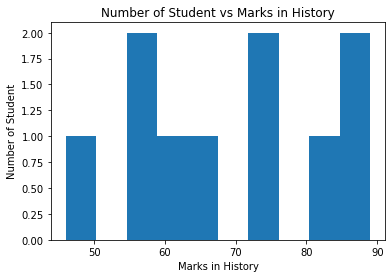

In [50]:
plt.hist(df["History"])
plt.xlabel('Marks in History')
plt.ylabel('Number of Student')
plt.title('Number of Student vs Marks in History')

Text(0.5, 1.0, 'Number of Student vs Marks in Civics')

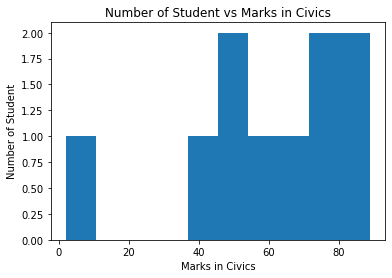

In [51]:
plt.hist(df["Civics"])
plt.xlabel('Marks in Civics')
plt.ylabel('Number of Student')
plt.title('Number of Student vs Marks in Civics')

The above plot shows that most of the studnts have performed relatively better in Civics except for one student who has just 2 marks which is probably a typo

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       10 non-null     object        
 1   Gender     10 non-null     object        
 2   DOB        10 non-null     datetime64[ns]
 3   Maths      10 non-null     int64         
 4   Physics    10 non-null     int64         
 5   Chemistry  10 non-null     int64         
 6   English    10 non-null     int64         
 7   Biology    10 non-null     int64         
 8   Economics  10 non-null     int64         
 9   History    10 non-null     int64         
 10  Civics     10 non-null     int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 1008.0+ bytes


Let's look at the median scores and quartiles for all subjects

Text(0.5, 1.0, 'Number of Marks vs Subject - Boxplot')

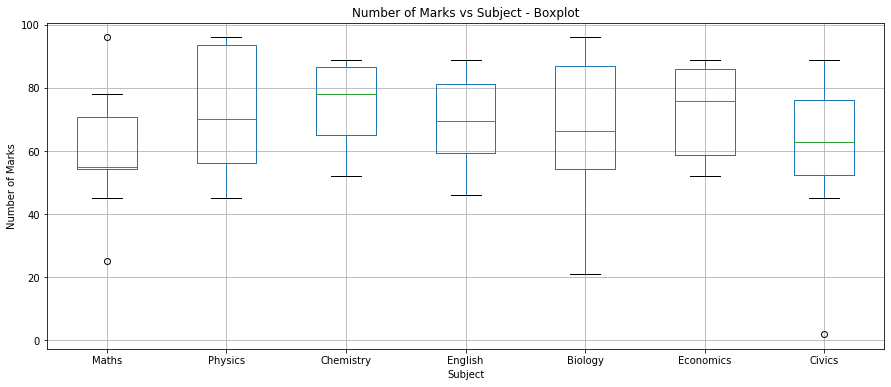

In [54]:
plt.figure(figsize=(15,6))
df.boxplot(['Maths', 'Physics', 'Chemistry','English','Biology','Economics','Civics',])
plt.xlabel('Subject')
plt.ylabel('Number of Marks')
plt.title('Number of Marks vs Subject - Boxplot')

The median of marks was highest for Chemistry followed by Economics whereas it was lowest for Maths followed by Civics

One Student has performed exceptionally well in maths ans one student has performed far worse than all 

Also there was an outlier in Civics very close to zero sugesting that it was a typo

In [55]:
df.head(12)

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,Annu,F,1988-04-05,45,87,52,89,55,89,87,52
1,Farha,F,1990-08-12,55,63,89,75,78,75,63,89
2,Jennifer,F,1989-09-02,58,96,78,46,96,77,83,53
3,Jessica,F,1990-08-12,78,96,86,63,54,89,75,45
4,John,M,1988-04-05,55,45,56,87,21,52,89,65
5,Mukesh,M,1989-09-02,96,46,77,83,58,83,46,77
6,pooja,F,1987-05-04,55,64,61,58,75,58,64,61
7,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
8,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87
9,Suresh,M,1987-05-04,75,96,78,64,90,61,58,2


In [56]:
df["Gender"].value_counts()

F    5
M    5
Name: Gender, dtype: int64

Let's group the studnt marks as per Gender 

In [57]:
gender = df.groupby(['Gender']).mean()
gender

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
Gender,,,,,,,,
F,58.2,81.2,73.2,66.2,71.6,77.6,74.4,60.0
M,61.0,63.4,77.4,73.2,57.8,67.8,65.0,61.0


The above table shows average marks of boys and girls in different subjects, girls have scored far better in Physics and Biology compared to Boys, whereas the average scores are very close for Maths and Civics

Let's add an Average Marks column to compare student performances

In [58]:
col = df.loc[: , "Maths":"Civics"]
df['Average Marks'] = col.mean(axis=1)
df

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Average Marks
0,Annu,F,1988-04-05,45,87,52,89,55,89,87,52,69.500
1,Farha,F,1990-08-12,55,63,89,75,78,75,63,89,73.375
2,Jennifer,F,1989-09-02,58,96,78,46,96,77,83,53,73.375
3,Jessica,F,1990-08-12,78,96,86,63,54,89,75,45,73.250
4,John,M,1988-04-05,55,45,56,87,21,52,89,65,58.750
5,Mukesh,M,1989-09-02,96,46,77,83,58,83,46,77,70.750
6,pooja,F,1987-05-04,55,64,61,58,75,58,64,61,62.000
7,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74,69.500
8,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87,64.625
9,Suresh,M,1987-05-04,75,96,78,64,90,61,58,2,65.500


Farha and Jennifer have the same highest average marks, in order to determine who was more consitent in their performance let's add a standard deviation in marks column

In [59]:
col = df.loc[: , "Maths":"Civics"]
df['Std Dev in Marks'] = col.std(axis=1)
df

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Average Marks,Std Dev in Marks
0,Annu,F,1988-04-05,45,87,52,89,55,89,87,52,69.500,19.985709
1,Farha,F,1990-08-12,55,63,89,75,78,75,63,89,73.375,12.351258
2,Jennifer,F,1989-09-02,58,96,78,46,96,77,83,53,73.375,19.093286
3,Jessica,F,1990-08-12,78,96,86,63,54,89,75,45,73.250,17.838562
4,John,M,1988-04-05,55,45,56,87,21,52,89,65,58.750,22.147235
5,Mukesh,M,1989-09-02,96,46,77,83,58,83,46,77,70.750,18.529899
6,pooja,F,1987-05-04,55,64,61,58,75,58,64,61,62.000,6.094494
7,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74,69.500,23.305425
8,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87,64.625,21.016575
9,Suresh,M,1987-05-04,75,96,78,64,90,61,58,2,65.500,29.002463


Clearly the scores obtained by Farha were more consistent when compared to that of Jennifer as confirmed by their standard deviation in marks, hence we can say that Farha was the best performer. Also John has the least average marks among all students

In [60]:
df

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Average Marks,Std Dev in Marks
0,Annu,F,1988-04-05,45,87,52,89,55,89,87,52,69.500,19.985709
1,Farha,F,1990-08-12,55,63,89,75,78,75,63,89,73.375,12.351258
2,Jennifer,F,1989-09-02,58,96,78,46,96,77,83,53,73.375,19.093286
3,Jessica,F,1990-08-12,78,96,86,63,54,89,75,45,73.250,17.838562
4,John,M,1988-04-05,55,45,56,87,21,52,89,65,58.750,22.147235
5,Mukesh,M,1989-09-02,96,46,77,83,58,83,46,77,70.750,18.529899
6,pooja,F,1987-05-04,55,64,61,58,75,58,64,61,62.000,6.094494
7,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74,69.500,23.305425
8,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87,64.625,21.016575
9,Suresh,M,1987-05-04,75,96,78,64,90,61,58,2,65.500,29.002463


Let's look at how many students failed the exams if passing marks in each subject was 40

In [61]:
df[(df["Maths"]<40)|(df["Physics"]<40)|(df["Chemistry"]<40)|(df["English"]<40)|(df["Biology"]<40)|(df["Economics"]<40)|(df["History"]<40)|(df["Civics"]<40)]

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Average Marks,Std Dev in Marks
4,John,M,1988-04-05,55,45,56,87,21,52,89,65,58.750,22.147235
7,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74,69.500,23.305425
8,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87,64.625,21.016575
9,Suresh,M,1987-05-04,75,96,78,64,90,61,58,2,65.500,29.002463


John and Ritesh failed in Biology (21 marks), Ramesh Failed in Maths (25 marks), and Suresh Failed in Civics (2 marks)

Let's look at students who scored more than 90 marks in any subject

In [62]:
df[(df["Maths"]>=90)|(df["Physics"]>=90)|(df["Chemistry"]>=90)|(df["English"]>=90)|(df["Biology"]>=90)|(df["Economics"]>=90)|(df["History"]>=90)|(df["Civics"]>=90)]

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Average Marks,Std Dev in Marks
2,Jennifer,F,1989-09-02,58,96,78,46,96,77,83,53,73.375,19.093286
3,Jessica,F,1990-08-12,78,96,86,63,54,89,75,45,73.250,17.838562
5,Mukesh,M,1989-09-02,96,46,77,83,58,83,46,77,70.750,18.529899
7,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74,69.500,23.305425
9,Suresh,M,1987-05-04,75,96,78,64,90,61,58,2,65.500,29.002463


Jennifer has the max numner of highest scores (96) in two subjects

Also 3 students have got the highest scores in physics (96) which is highest among all subjects